<a href="https://colab.research.google.com/github/selfor21/NN-FROM-SCRATCH-LOW-LEVEL/blob/main/C_05_NN_Error_with_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''In general, neural network will have two types of activation functions.
The first will be the function used in hidden layers
Second will be used in the output layer.
Usually the function used for hidden neurons will be the same for all of them.'''

'In general, neural network will have two types of activation functions.\nThe first will be the function used in hidden layers\nSecond will be used in the output layer.\nUsually the function used for hidden neurons will be the same for all of them.'

## The Activation Function

In [1]:
# The Step Activation Function
# The Linear Activation Function
# The Sigmoid Activation Function
# The Rectified Linear Activation Function


In [2]:
pip install nnfs

In [3]:
import numpy as np
import math
import nnfs
nnfs.init()

In [4]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

In [5]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
      self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
      self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
      self.output = np.dot(inputs, self.weights) + self.biases


## ReLU Activation Function

In [6]:
class Activation_ReLU:
  # Forward Pass
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)


In [7]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)


In [8]:
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)


In [9]:
print(np.round(dense1.output[:5],4))

[[ 0.e+00  0.e+00  0.e+00]
 [-1.e-04  1.e-04 -0.e+00]
 [-3.e-04  3.e-04 -1.e-04]
 [-4.e-04  5.e-04 -1.e-04]
 [-6.e-04  7.e-04 -1.e-04]]


In [10]:
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)
print(np.round(activation1.output[:5],8))

[[0.         0.         0.        ]
 [0.         0.00011395 0.        ]
 [0.         0.00031729 0.        ]
 [0.         0.00052666 0.        ]
 [0.         0.00071401 0.        ]]


## Softmax Activation Function

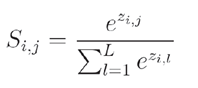

In [11]:
# The Softmax activation on the output data can take in non-normalized, or uncalibrated, inputs and
# produce a normalized distribution of probabilities for our classes.

In [12]:
layer_outputs = [4.8, 1.21, 2.385]
exp_values = []
for output in layer_outputs:
  exp_values.append(math.e ** output) # ** - power operator in Python
print('exponentiated values:')
print(np.round(exp_values,2))

exponentiated values:
[121.51   3.35  10.86]


In [13]:
# Now normalize values
norm_base = sum(exp_values) # We sum all values
norm_values = []
for value in exp_values:
  norm_values.append(value / norm_base)
print('Normalized exponentiated values:')
print(np.round(norm_values,2))
print('Sum of normalized values:', np.round(sum(norm_values),2))

Normalized exponentiated values:
[0.9  0.02 0.08]
Sum of normalized values: 1.0


### effect of axis parameter

In [16]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
[8.9, -1.81, 0.2],
[1.41, 1.051, 0.026]])

In [17]:
print(np.sum(layer_outputs))

18.172


In [18]:
print(np.sum(layer_outputs, axis = None))

18.172


In [19]:
print(np.sum(layer_outputs, axis =0))

[15.11   0.451  2.611]


In [20]:
print(np.sum(layer_outputs, axis = 1))

[8.395 7.29  2.487]


In [21]:
print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [22]:
print('Sum axis 1, but keep the same dimensions as input:')
print(np.sum(layer_outputs, axis=1, keepdims=True))


Sum axis 1, but keep the same dimensions as input:
[[8.395]
 [7.29 ]
 [2.487]]


In [14]:
# Softmax activation
class Activation_Softmax:
# Forward pass
  def forward(self, inputs):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1,
    keepdims=True))
  # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1,
    keepdims=True)
    self.output = probabilities

In [26]:
# Limitis of exponential function - it explodes easily.
# This is the reason of -np.max in the class Softmax.

print('exp de 1 =', np.exp(1))
print('exp de 10 =', np.exp(10))
print('exp de 100 =', np.exp(100))
print(np.exp(-np.inf), np.exp(0))

# output doesn´t change with a subctration of a constant due to the normalization.

exp de 1 = 2.718281828459045
exp de 10 = 22026.465794806718
exp de 100 = 2.6881171418161356e+43
0.0 1.0


In [27]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Make a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)
# Make a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)

In [28]:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
